In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats
import seaborn as sns

# Omiting WARNINGS
import warnings
warnings.filterwarnings('ignore')

# Importamos y limpiamos información de todas las carpetas de investigación

In [2]:
# Todas las carpetas
csv_path = "carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico.csv"
carpetas = pd.read_csv(csv_path,encoding = "latin-1")
carpetas.head()

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,2016.0,Mayo,2016-05-19 11:15:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN AGENCIAS DE ATENCIÃN ESPECI...,STCMZV,UI-1CD,CUAUHTEMOC,DOCTORES,2016,Mayo,2016-05-19 13:09:32,INTERIOR VAGON DEL METRO ESTACION NIÃOS HÃRO...,NIÃOS HEROES,-99.150633,19.419482,"19.4194819998,-99.150633"
1,2015.0,Diciembre,2015-12-04 10:00:00,DENUNCIA DE HECHOS,HECHO NO DELICTIVO,INVESTIGACIÃN PARA LA ATENCIÃN DE DELITOS SE...,FDS-6,FDS-6-01,GUSTAVO A MADERO,CHALMA DE GUADALUPE,2016,Mayo,2016-05-19 13:09:56,QUERETARO NO.86 MZ 520 LT 13,NaN,-99.153112,19.549869,"19.5498689998,-99.153112"
2,2016.0,Mayo,2016-05-19 01:30:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN IZTAPALAPA,IZP-2,UI-1CD,IZTAPALAPA,LOS REYES CULHUACÃN,2016,Mayo,2016-05-19 13:21:33,CUAUHTEMOC MZ.15 LT.8,SILOS,-99.110467,19.347049,"19.3470489998,-99.110467"
3,2016.0,Mayo,2016-05-19 12:30:00,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN CO...,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN GUSTAVO A. MADERO,GAM-2,UI-1CD,GUSTAVO A MADERO,GERTRUDIS SANCHEZ 3A SECCION,2016,Mayo,2016-05-19 13:24:45,CALLE NORTE 84,ESQUINA ORIENTE 107,-99.101675,19.462630,"19.4626299998,-99.101675"
4,2016.0,Mayo,2016-05-06 18:40:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN TLAHUAC,TLH-2,UI-1SD,IZTAPALAPA,AREA FEDERAL PANTEON SAN LORENZO TEZONCO,2016,Mayo,2016-05-19 13:25:05,PROVIDENCIA,TESORO,-99.056319,19.308832,"19.3088319998,-99.056319"


In [3]:
# Separar 2018
carpetas2018=carpetas.loc[carpetas["ao_hechos"] == 2018, :]
#carpetas2018=carpetas2018.loc[carpetas2018["mes_hechos"] =="", :]


In [4]:
# Creamos la columna conducta
carpetas2018["conducta"] = carpetas2018["delito"]


In [5]:
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ABUSO DE CONFIANZA", "ENGAÑO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("FRAUDE", "ENGAÑO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("LA ADMINISTRACION DE JUSTICIA", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("VIOLENCIA FAMILIAR", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A NEGOCIO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE OBJETOS", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("AMENAZAS", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DENUNCIA DE HECHOS", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE ACCESORIOS DE AUTO", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ABUSO DE CONFIANZA", "ENGAÑO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO", "ENGAÑO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A CASA HABITACION SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A NEGOCIO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("NARCOMENUDEO POSESION SIMPLE", "NARCO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DESPOJO", "ENGAÑO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("LESIONES INTENCIONALES POR GOLPES", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ABUSO SEXUAL", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("USURPACIÃN DE IDENTIDAD", "ENGAÑO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE DINERO", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("LESIONES INTENCIONALES POR ARMA DE FUEGO", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE DOCUMENTOS", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE VEHICULO DE PEDALES", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ABUSO DE AUTORIDAD", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("TENTATIVA DE EXTORSION", "ENGAÑO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A REPARTIDOR CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("FALSIFICACION DE DOCUMENTOS", "ENGAÑO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE METROBUS SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("SUSTRACCION DE MENORES", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DELITOS AMBIENTALES", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ENCUBRIMIENTO", "ENGAÑO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE MOTOCICLETA CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR OTRAS CAUSAS", "MUERTES")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("VIOLACION", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("LESIONES INTENCIONALES", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("LESIONES INTENCIONALES POR ARMA BLANCA", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("QUEBRANTAMIENTO DE SELLOS", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("HOMICIDIO POR ARMA DE FUEGO", "HOMICIDIO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE MOTOCICLETA SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ALLANAMIENTO DE MORADA", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("LESIONES CULPOSAS POR TRANSITO VEHICULAR", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("LESIONES CULPOSAS", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("NEGACION DEL SERVICIO PUBLICO", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ABANDONO DE PERSONA", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ACOSO SEXUAL", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO A AUTOMOVIL", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE TRANSPORTE PÃBLICO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE TRANSPORTE PÃBLICO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("NARCOMENUDEO POSESIÃN CON FINES DE VENTA, COMERCIO Y SUMINISTRO", "NARCO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO PÃBLICO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE PESERO COLECTIVO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO PÃBLICO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DISCRIMINACION", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE OBJETOS A ESCUELA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PRIVACION DE LA LIBERTAD PERSONAL", "SECUESTRO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("INSOLVENCIA ALIMENTARIA", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("TORTURA", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("EXTORSION", "ENGAÑO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE PLACA DE AUTOMOVIL", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A REPARTIDOR SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN NEGOCIO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("USO INDEBIDO DE ATRIBUCIONES Y FACULTADES", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("FALSEDAD DE DECLARACIONES", "ENGAÑO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A CASA HABITACION CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("RESISTENCIA DE PARTICULARES (SE OPONGA O RESISTA)", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("TENTATIVA DE ROBO", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PORTACION ARMA/PROHIB.", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("LESIONES CULPOSAS POR CAIDA", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO / CONDUCTOR DE TAXI CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR SUICIDIO", "MUERTES")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DELITOS ELECTORALES", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("USO DE DOCUMENTO FALSO", "ENGAÑO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("EJERCICIO INDEBIDO DEL SERVIDOR PUBLICO", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("COHECHO", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("CONTRA FUNCIONARIOS PUBLICOS", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE METRO CON VIOLENCIA", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("RESPONSABILIDAD PROFESIONAL", "ENGAÑO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("HOMICIDIOS INTENCIONALES (OTROS)", "HOMICIDIO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR TRÃNSITO VEHICULAR (ATROPELLADO)", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("HOMICIDIO POR ARMA BLANCA", "HOMICIDIO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A OFICINA PÃBLICA SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN RESTAURANT CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PORTACION DE ARMA DE FUEGO", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A CASA HABITACION Y VEHICULO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("TRATA DE PERSONAS", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE ANIMALES", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE ARMA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR CAIDA", "MUERTES")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DAÃ‘O EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO VEHICULAR A BIENES INMUEBLES", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO VEHICULAR A AUTOMOVIL", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A CASA HABITACION", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PORNOGRAFIA INFANTIL", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DESOBEDENCIA DE PARTICULARES", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DISPAROS DE ARMA DE FUEGO", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PRIV. ILEGAL DE LA LIB. Y ROBO DE VEHICULO", "SECUESTRO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("VIOLACION EQUIPARADA", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("HOMICIDIO POR GOLPES", "HOMICIDIO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE TAXI SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ABORTO", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("CORRUPCION DE MENORES", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("POSESION DE VEHICULO ROBADO", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DELITOS DE ABOGADOS PATRONOS Y LITIGANTES", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("LESIONES CULPOSAS POR QUEMADURAS", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR ENFERMEDAD", "MUERTES")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR PARO CARDIACO", "MUERTES")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("TENTATIVA DE HOMICIDIO", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE PESERO COLECTIVO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("TENTATIVA DE ROBO DE VEHICULO", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ATAQUE A LAS VIAS DE COMUNICACION (DAÃO A VIAS O MEDIOS DE TRANSPORTE)", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR PRECIPITACION", "MUERTES")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("LESIONES CULPOSAS POR CAIDA DE VEHÃCULO EN MOVIMIENTO", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A REPARTIDOR Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE FLUIDOS", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE METROBUS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("FEMINICIDIO", "HOMICIDIO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("USURPACION DE FUNCIONES", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("TENTATIVA DE FRAUDE", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A TRANSPORTISTA Y VEHICULO PESADO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("HOMICIDIO CULPOSO", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE ALHAJAS", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("REVELACION DE SECRETOS", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("INTIMIDACION", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ESTUPRO", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN PARQUES Y MERCADOS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO DE TRANSPORTE SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("VIOLACION TUMULTUARIA", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR SUICIDIO EN EL METRO", "MUERTES")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A NEGOCIO Y VEHICULO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("EXPLOTACIÃN DE MENOR O DISCAPACITADO", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PLAGIO O SECUESTRO", "SECUESTRO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("USURPACION DE PROFESION", "ENGAÑO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A REPARTIDOR Y VEHICULO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A NEGOCIO Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("COBRANZA ILEGITIMA", "ENGAÑO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO DE TRANSPORTE CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO EN ECOBUS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO EN RTP CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO EN AUTOBÃS FORÃNEO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A TRANSEUNTE SALIENDO DEL CAJERO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("TENTATIVA DE VIOLACION", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR QUEMADURA", "MUERTES")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR AHOGAMIENTO", "MUERTES")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("HOMICIDIO CULPOSO FUERA DEL D.F (ATROPELLADO)", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DDH OTRAS MATERIAS", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR ARMA DE FUEGO", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO EN RTP SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("TRAFICO DE INFANTES", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR DERRUMBE", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("VIOLACION DE CORRESPONDENCIA", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DESAPARICION FORZADA DE PERSONAS", "HOMICIDIO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("VIOLACION EQUIPARADA POR CONOCIDO", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR ACCIDENTE LABORAL", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DURANTE TRASLADO DE VALORES (NOMINA) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("LESIONES CULPOSAS ACCIDENTE LABORAL", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A SUCURSAL BANCARIA (SUPERMERCADO) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO EN TREN LIGERO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("HOMICIDIO POR AHORCAMIENTO", "HOMICIDIO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO EN TROLEBUS SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PECULADO", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR TRÃNSITO VEHICULAR (CAIDA)", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR INTOXICACION", "MUERTES")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ATAQUES A LA PAZ PUBLICA", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE MAQUINARIA CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR CONGESTION ALCOHOLICA", "MUERTES")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("TRAFICO DE INFLUENCIA", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PERSONAS EXTRAVIADAS", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("FALSIFICACION DE SELLOS, MARCAS, LLAVES Y OTROS", "ENGAÑO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DDH ANONIMAS", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO EN TREN SUBURBANO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO EN TREN LIGERO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DDH RELACIONADAS", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("OPOSICION A LA OBRA PUBLICA", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("REGULACIÃN URBANA", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A CASA HABITACION Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A TRANSPORTISTA Y VEHICULO PESADO SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO A BORDO DE PESERO Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A SUCURSAL BANCARIA (ASALTO BANCARIO) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("TENTATIVA DE SUICIDIO", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR TRÃNSITO VEHICULAR", "MUERTES")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO OFICIAL SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("EVASION DE PRESOS", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DDH INCOMPETENCIA", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE INFANTE", "SECUESTRO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN VIA PUBLICA (NOMINA) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO EN INTERIOR DE EMPRESA (NOMINA) SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE VEHICULO DE SERVICIO OFICIAL CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("OPERACIONES CON RECURSOS DE PROCEDENCIA ILICITA", "ENGAÑO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN TERMINAL DE PASAJEROS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DE MAQUINARIA SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A OFICINA PÃBLICA CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DDH SIN DATOS", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("INHUMACIONES Y/O EXHUMACIONES", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR INSTRUMENTO PUNZO CORTANTE", "MUERTES")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("MALTRATO ANIMAL", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("VARIACION DE NOMBRE O DOMICILIO", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("BIGAMIA", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("HOMICIDIO CULPOSO FUERA DEL D.F (COLISION)", "MUERTES")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN CINE CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("CONTRA EL ESTADO CIVIL", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DDH OFICIO COLABORACION", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A TRANSEUNTE EN HOTEL CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO EN TROLEBUS CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A SUCURSAL BANCARIA (SUPERMERCADO) SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("SABOTAJE", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PELIGRO DE CONTAGIO", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR ASFIXIA", "MUERTES")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ENTREGA ILEGITIMA DE UN MENOR", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ENRIQUECIMIENTO ILICITO", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("CALUMNIAS", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("LENOCINIO", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("VIOLACION DE LA INTIMIDAD", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("EXPOSICION DE MENORES", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DIFAMACION", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("CONCUSION", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DDH CERESO", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DDH FRVT", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("CAMBIO DE USO DE SUELO", "ENGAÑO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO DURANTE TRASLADO DE VALORES (NOMINA) SIN VIOLENCIA", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A TRANSEUNTE Y VEHICULO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PERDIDA DE LA VIDA POR ENVENENAMIENTO", "MUERTES")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DDH FDS", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO A PASAJERO EN TREN SUBURBANO CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DENUNCIA DE HECHOS POR ROBO DE CELULAR", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ROBO EN INTERIOR DE EMPRESA (NOMINA) CON VIOLENCIA", "ASALTO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DENUNCIA DE HECHOS POR ROBO DE CELULAR", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DENUNCIA DE HECHOS POR ROBO DE CELULAR", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DENUNCIA DE HECHOS POR ROBO DE CELULAR", "ROBO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PERDIDA DE LA VIDA ASFIXIA POR ALIMENTOS/ LIQUIDOS", "MUERTES")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("USO INDEBIDO DE CONDECORACIONES UNIFORMES E INSIGNIAS", "ENGAÑO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("PRIVACION DE LA LIBERTAD PERSONAL (REALIZAR ACTO SEXUAL)", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÃ“N)", "SECUESTRO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("HOMICIDIO CULPOSO POR TRÃNSITO VEHICULAR (COLISION)", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO VEHICULAR A BIENES INMUEBLES", "ACCIDENTE")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÃN)", "SECUESTRO")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("ATAQUE A LAS VIAS GENERALES DE COMUNICACIÃN", "ADMON")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA INTENCIONAL A VIAS DE COMUNICACION", "VIOLENCIA")
carpetas2018["conducta"] = carpetas2018["conducta"].replace("DAÃO EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO VEHICULAR A VIAS DE COMUNICACION", "ACCIDENTE")

In [6]:
delito=carpetas2018["conducta"].value_counts()
delito1= pd.DataFrame(delito).reset_index()
delito1.head(30)

,index,conducta
0,ROBO,81666
1,VIOLENCIA,53884
2,ASALTO,43447
3,ENGAÑO,36119
4,ADMON,14842
5,ACCIDENTE,11113
6,NARCO,5974
7,MUERTES,2337
8,HOMICIDIO,1550
9,SECUESTRO,894


In [7]:
# Saving to CSV file:
carpetas2018.to_csv("Carpetas2018.csv")

# Trabajamos sólo con Carpetas de 2018

In [8]:
########################################################################
# Open "carpetas2018.csv"
csv_path = "Carpetas2018.csv"
carpetas2018 = pd.read_csv(csv_path,encoding = "utf-8")
carpetas2018.head()

,Unnamed: 0,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,conducta
0,21453,2018.0,Septiembre,2018-09-30 23:10,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN BENITO JUÃREZ,BJ-1,UI-1SD,BENITO JUAREZ,CIUDAD DE LOS DEPORTES,2018,Diciembre,2018-12-01 00:00,PENSILVANIA,NaN,-99.176638,19.385574,"19.3855741511,-99.1766377348",ROBO
1,21454,2018.0,Octubre,2018-10-26 12:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN MIGUEL HIDALGO,MH-1,UI-1SD,MIGUEL HIDALGO,ANAHUAC,2018,Diciembre,2018-12-01 00:19,LAGO ZIRAHUEN,NaN,-99.173020,19.444202,"19.4442020012,-99.1730199414",ENGAÑO
2,21455,2018.0,Agosto,2018-08-17 07:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN MIGUEL HIDALGO,MH-4,UI-2SD,MIGUEL HIDALGO,ESCANDÃN I SECCIÃN,2018,Diciembre,2018-12-01 00:37,MARTIRES DE TACUBAYA,NaN,-99.183591,19.397132,"19.3971318825,-99.1835911348",ENGAÑO
3,21456,2018.0,Octubre,2018-10-30 07:15,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN IZTAPALAPA,IZP-4,UI-2SD,IZTAPALAPA,EL RETOÃO,2018,Diciembre,2018-12-01 00:45,CALZADA DE LA VIGA,NaN,-99.122577,19.372043,"19.3720428325,-99.1225767038",ROBO
4,21457,2018.0,Noviembre,2018-11-30 13:00,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN MIGUEL HIDALGO,MH-1,UI-1SD,MIGUEL HIDALGO,ARGENTINA ANTIGUA,2018,Diciembre,2018-12-01 00:46,LAGO ARGENTINA,NaN,-99.200325,19.456944,"19.4569436872,-99.2003248624",ROBO


In [9]:
# Create Delito
#
delito1 = delito1.rename(columns={"index":"Conducta","conducta":"Denuncias"})

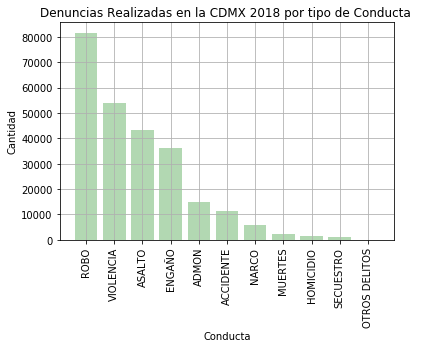

In [10]:
x_axis = np.arange(len(delito1))
#denun=pd.DataFrame(delito1["Denuncias"].map("{:,}".format))

plt.bar(x_axis,delito1["Denuncias"] , color='green', alpha=.3, align="center")
plt.title("Denuncias Realizadas en la CDMX 2018 por tipo de Conducta ")
plt.xlabel("Conducta")
plt.ylabel("Cantidad")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, delito1["Conducta"],rotation=90)   
plt.grid()

In [11]:
########################################################################
# Open "carpetas2018.csv"
csv_path = "Carpetas2018.csv"
carpetas2018 = pd.read_csv(csv_path,encoding ="utf-8")
carpetas2018.head()

,Unnamed: 0,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,conducta
0,21453,2018.0,Septiembre,2018-09-30 23:10,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN BENITO JUÃREZ,BJ-1,UI-1SD,BENITO JUAREZ,CIUDAD DE LOS DEPORTES,2018,Diciembre,2018-12-01 00:00,PENSILVANIA,NaN,-99.176638,19.385574,"19.3855741511,-99.1766377348",ROBO
1,21454,2018.0,Octubre,2018-10-26 12:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN MIGUEL HIDALGO,MH-1,UI-1SD,MIGUEL HIDALGO,ANAHUAC,2018,Diciembre,2018-12-01 00:19,LAGO ZIRAHUEN,NaN,-99.173020,19.444202,"19.4442020012,-99.1730199414",ENGAÑO
2,21455,2018.0,Agosto,2018-08-17 07:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN MIGUEL HIDALGO,MH-4,UI-2SD,MIGUEL HIDALGO,ESCANDÃN I SECCIÃN,2018,Diciembre,2018-12-01 00:37,MARTIRES DE TACUBAYA,NaN,-99.183591,19.397132,"19.3971318825,-99.1835911348",ENGAÑO
3,21456,2018.0,Octubre,2018-10-30 07:15,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN IZTAPALAPA,IZP-4,UI-2SD,IZTAPALAPA,EL RETOÃO,2018,Diciembre,2018-12-01 00:45,CALZADA DE LA VIGA,NaN,-99.122577,19.372043,"19.3720428325,-99.1225767038",ROBO
4,21457,2018.0,Noviembre,2018-11-30 13:00,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN MIGUEL HIDALGO,MH-1,UI-1SD,MIGUEL HIDALGO,ARGENTINA ANTIGUA,2018,Diciembre,2018-12-01 00:46,LAGO ARGENTINA,NaN,-99.200325,19.456944,"19.4569436872,-99.2003248624",ROBO


In [12]:
# Remplazamos Municipios fuera de la CDMX:
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("DOLORES HIDALGO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("NAUCALPAN DE JUAREZ", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ECATEPEC DE MORELOS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("NEZAHUALCOYOTL", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("QUERETARO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ATIZAPAN DE ZARAGOZA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CHALCO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("HUIXQUILUCAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TOLUCA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("COLON", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CUAUTITLAN IZCALLI", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CELAYA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("LEON", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TLALNEPANTLA DE BAZ", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TECAMAC", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("LA PAZ", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CUERNAVACA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CUAUTLA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("PUEBLA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("COACALCO DE BERRIOZABAL", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ZACATECAS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CORDOBA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("MONTERREY", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("VERACRUZ", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TLAXCALA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("VALLE DE CHALCO SOLIDARIDAD", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CORREGIDORA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CHILPANCINGO DE LOS BRAVO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CHIMALHUACAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("YURIDIA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CHICONCUAC", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("XALAPA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("IRAPUATO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEHUACAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TULTITLAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CAMPECHA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("YURIRIA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("PACHUCA DE SOTO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("SAN MATIAS TLALANCALECA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("GUADALUPE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ALTO LUCERO DE GUTIERREZ BARRIOS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TULANCINGO DE BRAVO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CORTAZAR", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("HERMOSILLO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("MINERAL DEL MONTE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("SANTA MARIA COYOTEPEC", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CAMPECHE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TENANGO DEL VALLE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("LAZARO CARDENAS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEOTITLAN DE FLORES MAGON", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("EZEQUIEL MONTES", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("AHOME", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("PROGRESO DE OBREGON", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CHICOLOAPAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("IGUALA DE LA INDEPENDENCIA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("SALAMANCA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("COLIMA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("IXTAPALUCA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("BUCTZOTZ", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("GARCIA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("BUENAVENTURA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CAÃÂADA MORELOS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEPIC", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("APASEO EL GRANDE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CADEREYTA DE MONTES", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("AGUASCALIENTES", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("VALLE HERMOSO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ZUMPANGO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("SAN GREGORIO ATZOMPA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("REYNOSA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("IZUCAR DE MATAMOROS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("OAXACA DE JUAREZ", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CUAUTLANCINGO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CARDONAL", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("JALAPAN DE SERRA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ZAMORA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CULIACAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("COATZACOALCOS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TIZAYUCA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("PAPALOTLA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("POZA RICA DE HIDALGO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("NAVOJOA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEXCOCO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TAMPICO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("ALLENDE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEOCALTICHE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CUAUTITLAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEQUISQUIAPAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("SAN BARTOLO COYOTEPEC", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("PUERTO VALLARTA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("PATZCUARO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CHIHUAHUA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("AMECAMECA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("HUITZILAC", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("MORELOS", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("SAN FRANCISCO DEL RINCON", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("NICOLAS ROMERO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TLAXCO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEOTIHUACAN", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("HUEHUETOCA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("MERIDA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("VILLAHERMOSA O CENTRO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("GUANAJUATO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("IXTAPAN DE LA SAL", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("GUADALAJARA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TIJUANA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("LAFRAGUA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("AMEALCO DE BONFIL", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("TEZOYUCA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("JALPAN DE SERRA", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("OTHON P. BLANCO", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("EL BOSQUE", "FUERA DE LA CDMX")
carpetas2018["alcaldia_hechos"]= carpetas2018["alcaldia_hechos"].replace("CAÃADA MORELOS", "FUERA DE LA CDMX")

In [13]:
# Renombramos columnas:
alcaldias = carpetas2018["alcaldia_hechos"].value_counts()
alcaldias1 = pd.DataFrame(alcaldias).reset_index()
alcaldias1 = alcaldias1.rename(columns={"index":"Alcaldia","alcaldia_hechos":"Denuncias"})
alcaldias1.head(20)

,Alcaldia,Denuncias
0,CUAUHTEMOC,40138
1,IZTAPALAPA,37326
2,GUSTAVO A MADERO,25206
3,BENITO JUAREZ,22317
4,COYOACAN,16871
5,ALVARO OBREGON,16590
6,MIGUEL HIDALGO,16511
7,VENUSTIANO CARRANZA,15016
8,TLALPAN,14338
9,AZCAPOTZALCO,12125


In [14]:
# Saving to CSV file:
carpetas2018.to_csv("Carpetas2018.csv")

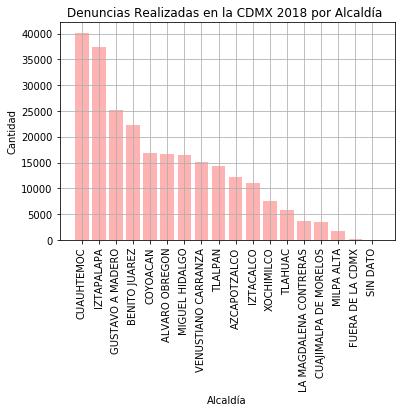

In [15]:
x_axis = np.arange(len(alcaldias1))

plt.bar(x_axis,alcaldias1["Denuncias"] , color='red', alpha=.3, align="center")
plt.title("Denuncias Realizadas en la CDMX 2018 por Alcaldía ")
plt.xlabel("Alcaldía")
plt.ylabel("Cantidad")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, alcaldias1["Alcaldia"],rotation=90)   
plt.grid()

In [16]:
# Groupin by Alcaldía y Conducta:
base=carpetas2018.groupby(["alcaldia_hechos","conducta"]).count()["delito"].rename("Denuncias")

# Convert to DataFrame
DenunciasxAlcaldia = pd.DataFrame(base).reset_index()

# Preview DataFrame
DenunciasxAlcaldia.head(20)

,alcaldia_hechos,conducta,Denuncias
0,ALVARO OBREGON,ACCIDENTE,748
1,ALVARO OBREGON,ADMON,798
2,ALVARO OBREGON,ASALTO,3305
3,ALVARO OBREGON,ENGAÑO,2437
4,ALVARO OBREGON,HOMICIDIO,96
5,ALVARO OBREGON,MUERTES,127
6,ALVARO OBREGON,NARCO,294
7,ALVARO OBREGON,OTROS DELITOS,6
8,ALVARO OBREGON,ROBO,4751
9,ALVARO OBREGON,SECUESTRO,70


In [17]:
# Minor Data Munging to Re-Format the Data Frames
Conductaxalcaldía = DenunciasxAlcaldia.pivot(index = "conducta", columns ="alcaldia_hechos", values ="Denuncias" ) 
 
# Preview that Reformatting worked
Conductaxalcaldía["CUAUHTEMOC"].fillna(0,inplace=True)
Conductaxalcaldía["IZTAPALAPA"].fillna(0,inplace=True)
Conductaxalcaldía["GUSTAVO A MADERO"].fillna(0,inplace=True)
Conductaxalcaldía["BENITO JUAREZ"].fillna(0,inplace=True)
Conductaxalcaldía["COYOACAN"].fillna(0,inplace=True)
Conductaxalcaldía["ALVARO OBREGON"].fillna(0,inplace=True)
Conductaxalcaldía["MIGUEL HIDALGO"].fillna(0,inplace=True)
Conductaxalcaldía["VENUSTIANO CARRANZA"].fillna(0,inplace=True)
Conductaxalcaldía["TLALPAN"].fillna(0,inplace=True)
Conductaxalcaldía["AZCAPOTZALCO"].fillna(0,inplace=True)
Conductaxalcaldía["CUAJIMALPA DE MORELOS"].fillna(0,inplace=True)
Conductaxalcaldía["FUERA DE LA CDMX"].fillna(0,inplace=True)
Conductaxalcaldía["IZTACALCO"].fillna(0,inplace=True)
Conductaxalcaldía["LA MAGDALENA CONTRERAS"].fillna(0,inplace=True)
Conductaxalcaldía["MIGUEL HIDALGO"].fillna(0,inplace=True)
Conductaxalcaldía["MILPA ALTA"].fillna(0,inplace=True)
Conductaxalcaldía["SIN DATO"].fillna(0,inplace=True)
Conductaxalcaldía["TLAHUAC"].fillna(0,inplace=True)
Conductaxalcaldía["XOCHIMILCO"].fillna(0,inplace=True)

#Conductaxalcaldía = Conductaxalcaldía["ALVARO OBREGON"].map("{:,}".format)
Conductaxalcaldía

alcaldia_hechos,ALVARO OBREGON,AZCAPOTZALCO,BENITO JUAREZ,COYOACAN,CUAJIMALPA DE MORELOS,CUAUHTEMOC,FUERA DE LA CDMX,GUSTAVO A MADERO,IZTACALCO,IZTAPALAPA,LA MAGDALENA CONTRERAS,MIGUEL HIDALGO,MILPA ALTA,SIN DATO,TLAHUAC,TLALPAN,VENUSTIANO CARRANZA,XOCHIMILCO
conducta,,,,,,,,,,,,,,,,,,
ACCIDENTE,748.0,507.0,894.0,937.0,261.0,1427.0,9.0,1130.0,479.0,1367.0,202.0,722.0,155.0,0.0,304.0,742.0,766.0,368.0
ADMON,798.0,429.0,918.0,942.0,237.0,3273.0,20.0,1264.0,568.0,2397.0,238.0,763.0,103.0,5.0,272.0,871.0,1206.0,367.0
ASALTO,3305.0,2525.0,2766.0,2045.0,247.0,5825.0,15.0,4462.0,2569.0,9145.0,288.0,3576.0,124.0,0.0,1021.0,1578.0,2132.0,1362.0
ENGAÑO,2437.0,1519.0,4898.0,2770.0,658.0,7046.0,83.0,3020.0,1159.0,3649.0,415.0,2702.0,167.0,5.0,574.0,2380.0,1615.0,778.0
HOMICIDIO,96.0,58.0,21.0,47.0,16.0,139.0,7.0,259.0,54.0,319.0,24.0,56.0,17.0,2.0,58.0,107.0,115.0,69.0
MUERTES,127.0,70.0,144.0,113.0,43.0,364.0,3.0,256.0,71.0,361.0,34.0,133.0,32.0,0.0,73.0,147.0,248.0,94.0
NARCO,294.0,180.0,116.0,341.0,63.0,1062.0,0.0,858.0,146.0,1161.0,64.0,447.0,43.0,0.0,210.0,119.0,704.0,166.0
OTROS DELITOS,6.0,3.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0
ROBO,4751.0,4234.0,9795.0,6108.0,994.0,14416.0,15.0,7946.0,3190.0,10236.0,835.0,5899.0,349.0,0.0,1321.0,4411.0,4876.0,1964.0


In [18]:
# Tabla resumen de denuncias por mes, ordenadas SIN FORMATO:
carpetas2018 = carpetas2018[carpetas2018.mes_hechos != 'data']
mes = carpetas2018["mes_hechos"].value_counts()
mes1 = pd.DataFrame(mes).reset_index()
mes1 = mes1.rename(columns = {"index":"Mes","mes_hechos":"Denuncias"})
mes1['mes'] = mes1['Mes']
mes1['mes'] = mes1['mes'].replace('Octubre', '10')
mes1['mes'] = mes1['mes'].replace('Mayo', '5')
mes1['mes'] = mes1['mes'].replace('Agosto', '8')
mes1['mes'] = mes1['mes'].replace('Noviembre', '11')
mes1['mes'] = mes1['mes'].replace('Marzo', '3')
mes1['mes'] = mes1['mes'].replace('Julio', '7')
mes1['mes'] = mes1['mes'].replace('Septiembre', '9')
mes1['mes'] = mes1['mes'].replace('Junio', '6')
mes1['mes'] = mes1['mes'].replace('Abril', '4')
mes1['mes'] = mes1['mes'].replace('Diciembre', '12')
mes1['mes'] = mes1['mes'].replace('Febrero', '2')
mes1['mes'] = mes1['mes'].replace('Enero', '1')
mes1['mes'] = mes1['mes'].astype(int)
mes1 = pd.DataFrame(mes1).set_index('mes')
mes1 = mes1.sort_index()
mes1.head(13)

,Mes,Denuncias
mes,,
1,Enero,19485
2,Febrero,19490
3,Marzo,21132
4,Abril,20694
5,Mayo,22215
6,Junio,20796
7,Julio,21034
8,Agosto,21743
9,Septiembre,20899


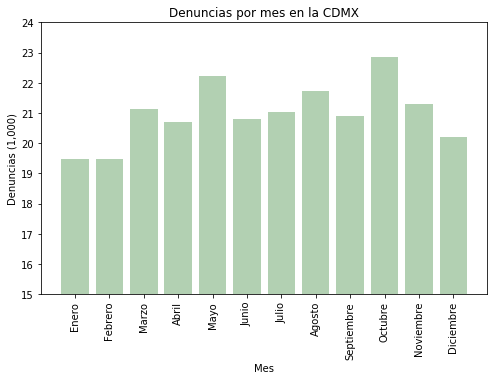

In [19]:
# Generate the Plot
Time = mes1['Mes']
plt.figure(figsize = (8, 5))
plt.bar(Time, mes1['Denuncias']/1000 , color = 'darkgreen', alpha = .3, align = 'center')
#plt.plot(Time, mes1['Denuncias']/1000, marker = 'o', color = 'darkblue', linestyle = '-')
#plt.grid()
plt.title('Denuncias por mes en la CDMX')
plt.xlabel('Mes')
plt.ylabel('Denuncias (1,000)')
plt.xticks(rotation = 90)   
plt.ylim(15, 24)

# Save the Figure
#plt.savefig("suvival.png")

# Show the Figure
plt.show()

In [20]:
# Tabla resumen de denuncias por mes, ordenadas CON FORMATO:
mes2 = mes1
Total = mes2['Denuncias'].sum()
mes2['%'] = 100*mes2['Denuncias']/Total
mes2['Denuncias'] = mes2['Denuncias'].astype(float).map("{:,.0f}".format)
mes2['%'] = mes2['%'].astype(float).map("{:,.2f}".format)
mes2

,Mes,Denuncias,%
mes,,,
1,Enero,"19,485",7.74
2,Febrero,"19,490",7.74
3,Marzo,"21,132",8.39
4,Abril,"20,694",8.22
5,Mayo,"22,215",8.82
6,Junio,"20,796",8.26
7,Julio,"21,034",8.35
8,Agosto,"21,743",8.63
9,Septiembre,"20,899",8.30


In [21]:
########################################################################
# Open "carpetas2018.csv"
csv_path = "Carpetas2018.csv"
carpetas2018 = pd.read_csv(csv_path,encoding ="utf-8")
#carpetas2018.head()

In [22]:
# hacer la fecha tipo fecha
carpetas2018['fecha_hechos'] = carpetas2018['fecha_hechos'].astype('datetime64[ns]')

In [23]:
# carpetas2018[].dayofweek
serie1 = carpetas2018['fecha_hechos']
serie1.dt.day_name()
carpetas2018["Dia_sem"] = pd.DataFrame(serie1.dt.day_name())
carpetas2018.head()

,Unnamed: 0,Unnamed: 0.1,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,...,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,conducta,Dia_sem
0,0,21453,2018.0,Septiembre,2018-09-30 23:10:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN BENITO JUÃREZ,BJ-1,UI-1SD,...,2018,Diciembre,2018-12-01 00:00,PENSILVANIA,NaN,-99.176638,19.385574,"19.3855741511,-99.1766377348",ROBO,Sunday
1,1,21454,2018.0,Octubre,2018-10-26 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN MIGUEL HIDALGO,MH-1,UI-1SD,...,2018,Diciembre,2018-12-01 00:19,LAGO ZIRAHUEN,NaN,-99.173020,19.444202,"19.4442020012,-99.1730199414",ENGAÑO,Friday
2,2,21455,2018.0,Agosto,2018-08-17 07:00:00,DESPOJO,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN MIGUEL HIDALGO,MH-4,UI-2SD,...,2018,Diciembre,2018-12-01 00:37,MARTIRES DE TACUBAYA,NaN,-99.183591,19.397132,"19.3971318825,-99.1835911348",ENGAÑO,Friday
3,3,21456,2018.0,Octubre,2018-10-30 07:15:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN IZTAPALAPA,IZP-4,UI-2SD,...,2018,Diciembre,2018-12-01 00:45,CALZADA DE LA VIGA,NaN,-99.122577,19.372043,"19.3720428325,-99.1225767038",ROBO,Tuesday
4,4,21457,2018.0,Noviembre,2018-11-30 13:00:00,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN MIGUEL HIDALGO,MH-1,UI-1SD,...,2018,Diciembre,2018-12-01 00:46,LAGO ARGENTINA,NaN,-99.200325,19.456944,"19.4569436872,-99.2003248624",ROBO,Friday


In [24]:
# Create day of week in ESP:
carpetas2018["Dia_sem"] = carpetas2018["Dia_sem"].replace("Monday", "Lunes")
carpetas2018["Dia_sem"] = carpetas2018["Dia_sem"].replace("Tuesday", "Martes")
carpetas2018["Dia_sem"] = carpetas2018["Dia_sem"].replace("Wednesday", "Miércoles")
carpetas2018["Dia_sem"] = carpetas2018["Dia_sem"].replace("Thursday", "Jueves")
carpetas2018["Dia_sem"] = carpetas2018["Dia_sem"].replace("Friday", "Viernes")
carpetas2018["Dia_sem"] = carpetas2018["Dia_sem"].replace("Saturday", "Sábado")
carpetas2018["Dia_sem"] = carpetas2018["Dia_sem"].replace("Sunday", "Domingo")
dias = carpetas2018["Dia_sem"].value_counts()

dias

Viernes      39360
Lunes        37976
Miércoles    37796
Jueves       37279
Martes       36896
Sábado       33315
Domingo      29228
Name: Dia_sem, dtype: int64

In [25]:
# Add Numer of DAY:
carpetas2018['dia'] = carpetas2018['Dia_sem']
carpetas2018['dia'] = carpetas2018['dia'].replace('Viernes', '5')
carpetas2018['dia'] = carpetas2018['dia'].replace('Lunes', '1')
carpetas2018['dia'] = carpetas2018['dia'].replace('Miércoles', '3')
carpetas2018['dia'] = carpetas2018['dia'].replace('Jueves', '4')
carpetas2018['dia'] = carpetas2018['dia'].replace('Martes', '2')
carpetas2018['dia'] = carpetas2018['dia'].replace('Sábado', '6')
carpetas2018['dia'] = carpetas2018['dia'].replace('Domingo', '7')
carpetas2018['dia'] = carpetas2018['dia'].astype(int)
carpetas2018 = carpetas2018.sort_values(by = ['dia'])
carpetas2018.head()

,Unnamed: 0,Unnamed: 0.1,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,...,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,conducta,Dia_sem,dia
251849,251849,930982,2018.0,Diciembre,2018-12-31 13:00:00,ABANDONO DE PERSONA,DELITO DE BAJO IMPACTO,"INVESTIGACIÃN PARA LA ATENCIÃN DE NIÃOS, NI...",59,UI-2CD,...,Diciembre,2019-12-31 18:07:42,AVENIDA JUAREZ NUMERO 8,JUZGADOS,NaN,NaN,NaN,VIOLENCIA,Lunes,1
75572,75572,330408,2018.0,Enero,2018-01-22 12:00:00,FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMEN...,DELITO DE BAJO IMPACTO,INVESTIGACIÃN PARA LA ATENCIÃN DE DELITOS FI...,T,UI-1SD,...,Febrero,2018-02-14 11:31,"BOULEVARD MANUEL AVILA CAMACHO,",NaN,-99.203470,19.428314,"19.4283142149,-99.2034701038",ENGAÑO,Lunes,1
211036,211036,745364,2018.0,Septiembre,2018-09-03 18:45:00,ALLANAMIENTO DE MORADA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN BENITO JUÃREZ,BJ-1,UI-1SD,...,Septiembre,2018-09-04 17:25,TLACOQUEMECATL,NaN,-99.174721,19.378548,"19.3785479745,-99.1747206501",VIOLENCIA,Lunes,1
211032,211032,745360,2018.0,Septiembre,2018-09-03 19:00:00,DAÃO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN ÃLVARO OBREGÃN,AO-3,UI-2CD,...,Septiembre,2018-09-04 17:13,CONDOR,NaN,-99.197648,19.361528,"19.3615277867,-99.19764767",VIOLENCIA,Lunes,1
75597,75597,330435,2018.0,Febrero,2018-02-12 16:30:00,ROBO DE DINERO,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN XOCHIMILCO,XO-2,UI-1SD,...,Febrero,2018-02-14 12:31,5 DE MAYO,HIDALGO,-99.054958,19.250885,"19.2508854323,-99.0549584418",ROBO,Lunes,1


In [26]:
# Grouping by month and week day:
carpetas2018_group = carpetas2018.groupby(['mes_hechos', 'dia', 'Dia_sem'])
#
Conductas_Mes_Dia = carpetas2018_group['delito'].count()
#
Conductas_Mes_Dia = pd.DataFrame(Conductas_Mes_Dia)

Conductas_Mes_Dia = Conductas_Mes_Dia.reset_index()

Conductas_Mes_Dia = Conductas_Mes_Dia.rename(columns = {"delito":"carpetas"})

Conductas_Mes_Dia["Dia de la semana"] = Conductas_Mes_Dia["dia"].astype(str) + " - " + \
                                Conductas_Mes_Dia["Dia_sem"].astype(str)

Conductas_Mes_Dia.head()

,mes_hechos,dia,Dia_sem,carpetas,Dia de la semana
0,Abril,1,Lunes,3673,1 - Lunes
1,Abril,2,Martes,2894,2 - Martes
2,Abril,3,Miércoles,2954,3 - Miércoles
3,Abril,4,Jueves,2768,4 - Jueves
4,Abril,5,Viernes,3108,5 - Viernes


In [53]:
# Eliminando Outliers
Conductas_Mes_Dia = Conductas_Mes_Dia[Conductas_Mes_Dia['carpetas'] > 500]

Text(0, 0.5, 'Número de carpetas')

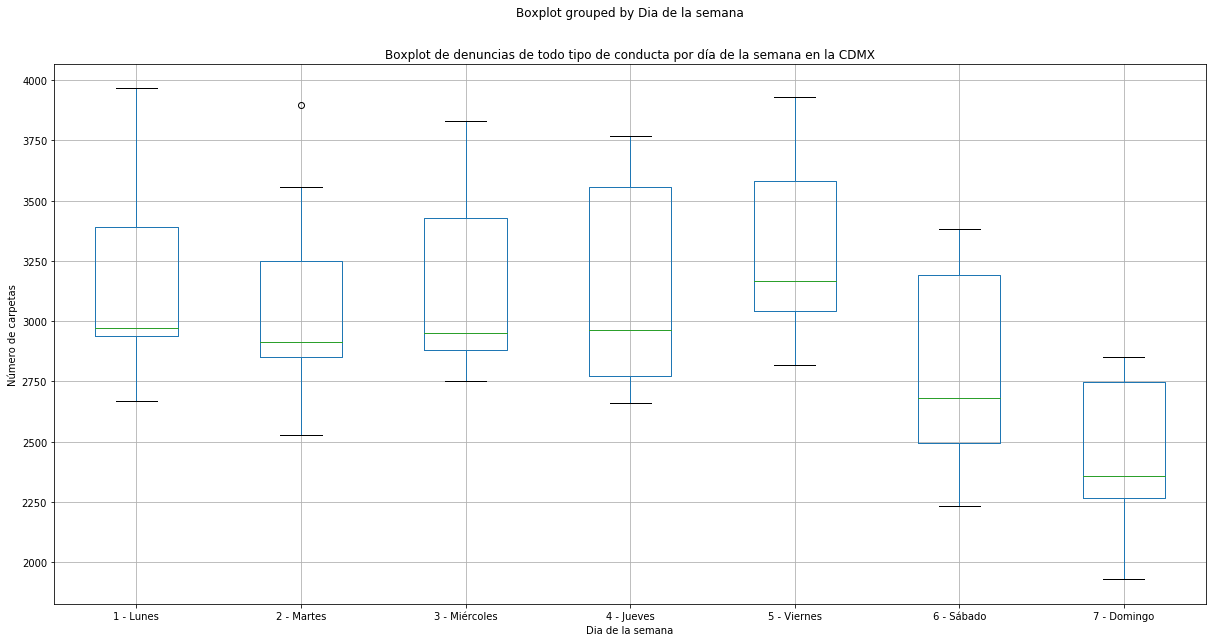

In [54]:
# Create a boxplot to compare means
Conductas_Mes_Dia.boxplot("carpetas", by = "Dia de la semana", figsize=(20, 10))
plt.title('Boxplot de denuncias de todo tipo de conducta por día de la semana en la CDMX')
#plt.xlabel('Día')
plt.ylabel('Número de carpetas')

In [55]:
# Extract individual groups for F-Test:
group1 = Conductas_Mes_Dia[Conductas_Mes_Dia["Dia_sem"] == "Lunes"]["carpetas"]
group2 = Conductas_Mes_Dia[Conductas_Mes_Dia["Dia_sem"] == "Martes"]["carpetas"]
group3 = Conductas_Mes_Dia[Conductas_Mes_Dia["Dia_sem"] == "Miércoles"]["carpetas"]
group4 = Conductas_Mes_Dia[Conductas_Mes_Dia["Dia_sem"] == "Jueves"]["carpetas"]  
group5 = Conductas_Mes_Dia[Conductas_Mes_Dia["Dia_sem"] == "Viernes"]["carpetas"]  
group6 = Conductas_Mes_Dia[Conductas_Mes_Dia["Dia_sem"] == "Sábado"]["carpetas"]  
group7 = Conductas_Mes_Dia[Conductas_Mes_Dia["Dia_sem"] == "Domingo"]["carpetas"]  

In [56]:
# Perform the ANOVA Test: H0: ALL DAYS have de same average
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=7.0832315571664335, pvalue=4.967265038145368e-06)

In [57]:
# Perform the ANOVA Test: H0: Mon-to-Sat DAYS have de same average
stats.f_oneway(group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=2.2206145569509497, pvalue=0.06247353693475113)

In [58]:
# Perform the ANOVA Test: H0: Mon-to-Fri have de same average
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=0.4647433914713175, pvalue=0.7612868842964369)

Text(0, 0.5, 'Frecuencia')

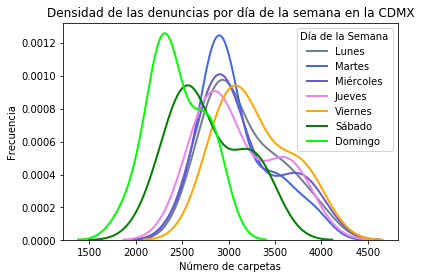

In [59]:
# Seven density function per day:
# Density Plot and Histogram of all conducts:
sns.distplot(group1, hist = False, kde = True, 
             bins = int(180/5), color = 'slategray', 
             hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth': 2}, 
             label = 'Lunes')

sns.distplot(group2, hist = False, kde = True, 
             bins = int(180/5), color = 'royalblue', 
             hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth': 2}, 
             label = 'Martes')

sns.distplot(group3, hist = False, kde = True, 
             bins = int(180/5), color = 'slateblue', 
             hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth': 2}, 
             label = 'Miércoles')

sns.distplot(group4, hist = False, kde = True, 
             bins = int(180/5), color = 'violet', 
             hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth': 2}, 
             label = 'Jueves')

sns.distplot(group5, hist = False, kde = True, 
             bins = int(180/5), color = 'orange', 
             hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth': 2}, 
             label = 'Viernes')

sns.distplot(group6, hist = False, kde = True, 
             bins = int(180/5), color = 'green', 
             hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth': 2}, 
             label = 'Sábado')

sns.distplot(group7, hist = False, kde = True, 
             bins = int(180/5), color = 'lime', 
             hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth': 2}, 
             label = 'Domingo')

plt.legend(prop = {'size': 10}, title = 'Día de la Semana')
plt.title('Densidad de las denuncias por día de la semana en la CDMX')
plt.xlabel('Número de carpetas')
plt.ylabel('Frecuencia')

In [63]:
# Grouping by month and week day (VIOLENCIA):
carpetas2018_2 = carpetas2018[carpetas2018['conducta'] == 'VIOLENCIA']

carpetas2018_group = carpetas2018_2.groupby(['mes_hechos', 'dia', 'Dia_sem'])
#
Violencia_Mes_Dia = carpetas2018_group['delito'].count()
#
Violencia_Mes_Dia = pd.DataFrame(Violencia_Mes_Dia)

Violencia_Mes_Dia = Violencia_Mes_Dia.reset_index()

Violencia_Mes_Dia = Violencia_Mes_Dia.rename(columns = {"delito":"carpetas"})

Violencia_Mes_Dia["Dia de la semana"] = Violencia_Mes_Dia["dia"].astype(str) + " - " + \
                                Violencia_Mes_Dia["Dia_sem"].astype(str)

Violencia_Mes_Dia.head()

,mes_hechos,dia,Dia_sem,carpetas,Dia de la semana
0,Abril,1,Lunes,774,1 - Lunes
1,Abril,2,Martes,550,2 - Martes
2,Abril,3,Miércoles,592,3 - Miércoles
3,Abril,4,Jueves,555,4 - Jueves
4,Abril,5,Viernes,618,5 - Viernes


In [64]:
# Eliminando Outliers
Violencia_Mes_Dia = Violencia_Mes_Dia[Violencia_Mes_Dia['carpetas'] > 300]

Text(0, 0.5, 'Número de carpetas')

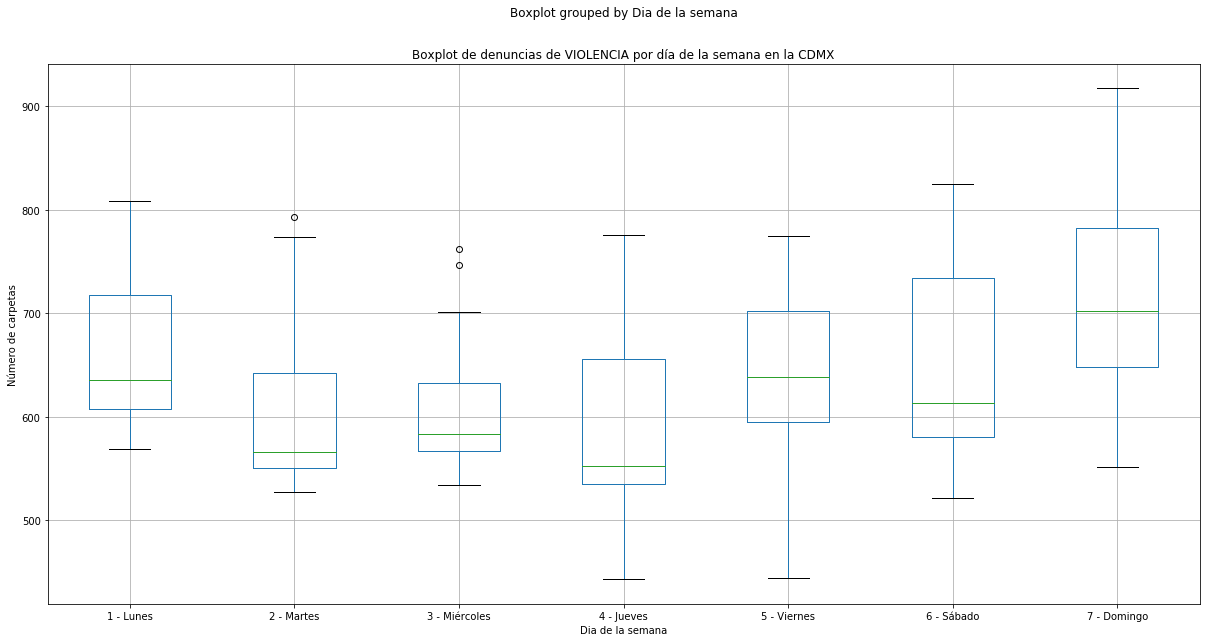

In [65]:
# Create a boxplot to compare means
Violencia_Mes_Dia.boxplot("carpetas", by = "Dia de la semana", figsize=(20, 10))
plt.title('Boxplot de denuncias de VIOLENCIA por día de la semana en la CDMX')
#plt.xlabel('Día')
plt.ylabel('Número de carpetas')

In [66]:
# Extract individual groups VIOLENCIA
group1_V = Violencia_Mes_Dia[Violencia_Mes_Dia["Dia_sem"] == "Lunes"]["carpetas"]
group2_V = Violencia_Mes_Dia[Violencia_Mes_Dia["Dia_sem"] == "Martes"]["carpetas"]
group3_V = Violencia_Mes_Dia[Violencia_Mes_Dia["Dia_sem"] == "Miércoles"]["carpetas"]
group4_V = Violencia_Mes_Dia[Violencia_Mes_Dia["Dia_sem"] == "Jueves"]["carpetas"]  
group5_V = Violencia_Mes_Dia[Violencia_Mes_Dia["Dia_sem"] == "Viernes"]["carpetas"]  
group6_V = Violencia_Mes_Dia[Violencia_Mes_Dia["Dia_sem"] == "Sábado"]["carpetas"]  
group7_V = Violencia_Mes_Dia[Violencia_Mes_Dia["Dia_sem"] == "Domingo"]["carpetas"]  

In [67]:
# Perform the ANOVA
stats.f_oneway(group1_V, group2_V, group3_V, group4_V, group5_V, group6_V, group7_V)

F_onewayResult(statistic=2.6844332085841454, pvalue=0.020287725672867882)

In [68]:
stats.f_oneway(group1_V, group2_V, group3_V, group4_V, group5_V, group6_V)

F_onewayResult(statistic=1.16124034777492, pvalue=0.3376286614210676)

In [69]:
stats.f_oneway(group2_V, group3_V, group4_V, group5_V, group6_V)

F_onewayResult(statistic=0.7984293111550732, pvalue=0.531398431725685)

In [70]:
stats.f_oneway(group2_V, group3_V, group4_V, group5_V)

F_onewayResult(statistic=0.4605456146388642, pvalue=0.7112493281762755)

Text(0, 0.5, 'Frecuencia')

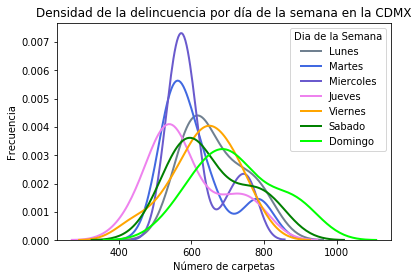

In [71]:
# Seven variables
# Density Plot and Histogram of all conducts:
sns.distplot(group1_V, hist = False, kde = True, 
             bins = int(180/5), color = 'slategray', 
             hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth': 2}, 
             label = 'Lunes')

sns.distplot(group2_V, hist = False, kde = True, 
             bins = int(180/5), color = 'royalblue', 
             hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth': 2}, 
             label = 'Martes')

sns.distplot(group3_V, hist = False, kde = True, 
             bins = int(180/5), color = 'slateblue', 
             hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth': 2}, 
             label = 'Miercoles')

sns.distplot(group4_V, hist = False, kde = True, 
             bins = int(180/5), color = 'violet', 
             hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth': 2}, 
             label = 'Jueves')

sns.distplot(group5_V, hist = False, kde = True, 
             bins = int(180/5), color = 'orange', 
             hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth': 2}, 
             label = 'Viernes')

sns.distplot(group6_V, hist = False, kde = True, 
             bins = int(180/5), color = 'green', 
             hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth': 2}, 
             label = 'Sabado')

sns.distplot(group7_V, hist = False, kde = True, 
             bins = int(180/5), color = 'lime', 
             hist_kws = {'edgecolor':'black'}, kde_kws = {'linewidth': 2}, 
             label = 'Domingo')

plt.legend(prop = {'size': 10}, title = 'Dia de la Semana')
plt.title('Densidad de la delincuencia por día de la semana en la CDMX')
plt.xlabel('Número de carpetas')
plt.ylabel('Frecuencia')

In [72]:
# Grouping by colonia and conducta:
carpetas2018_GCond = carpetas2018.groupby(['conducta', 'colonia_hechos'])
#
Conductas_Colonia = carpetas2018_GCond['delito'].count()
#
Conductas_Colonia = pd.DataFrame(Conductas_Colonia)

Conductas_Colonia = Conductas_Colonia.reset_index()

Conductas_Colonia = Conductas_Colonia.rename(columns = {"delito":"carpetas"})

Conductas_Colonia.head()

,conducta,colonia_hechos,carpetas
0,ACCIDENTE,10 DE ABRIL,4
1,ACCIDENTE,10 DE MAYO,7
2,ACCIDENTE,12 DE DICIEMBRE,3
3,ACCIDENTE,15 DE AGOSTO,10
4,ACCIDENTE,16 DE SEPTIEMBRE,3


In [73]:
# 
# Minor Data Munging to Re-Format the Data Frames
Por_Colonia = Conductas_Colonia.pivot(index = "colonia_hechos", columns = "conducta", values ="carpetas" )
Por_Colonia["ACCIDENTE"].fillna(0,inplace=True)
Por_Colonia["ADMON"].fillna(0,inplace=True)
Por_Colonia["ASALTO"].fillna(0,inplace=True)
Por_Colonia["ENGAÑO"].fillna(0,inplace=True)
Por_Colonia["HOMICIDIO"].fillna(0,inplace=True)
Por_Colonia["MUERTES"].fillna(0,inplace=True)
Por_Colonia["NARCO"].fillna(0,inplace=True)
Por_Colonia["OTROS DELITOS"].fillna(0,inplace=True)
Por_Colonia["ROBO"].fillna(0,inplace=True)
Por_Colonia["SECUESTRO"].fillna(0,inplace=True)
Por_Colonia["VIOLENCIA"].fillna(0,inplace=True)
Por_Colonia.head()

conducta,ACCIDENTE,ADMON,ASALTO,ENGAÑO,HOMICIDIO,MUERTES,NARCO,OTROS DELITOS,ROBO,SECUESTRO,VIOLENCIA
colonia_hechos,,,,,,,,,,,
10 DE ABRIL,4.0,0.0,4.0,2.0,0.0,0.0,2.0,0.0,9.0,0.0,4.0
10 DE MAYO,7.0,3.0,12.0,7.0,0.0,2.0,12.0,0.0,32.0,0.0,24.0
12 DE DICIEMBRE,3.0,1.0,2.0,6.0,0.0,0.0,0.0,0.0,14.0,0.0,13.0
15 DE AGOSTO,10.0,7.0,19.0,7.0,0.0,1.0,3.0,0.0,31.0,0.0,13.0
16 DE SEPTIEMBRE,3.0,2.0,14.0,11.0,0.0,0.0,1.0,0.0,10.0,0.0,13.0


The r-squared is: 0.8962216952233131


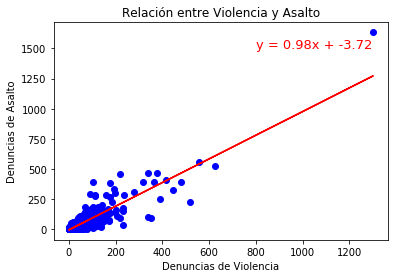

In [74]:
# Scatter Plot
# Getting x and y values
x_values = Por_Colonia['VIOLENCIA']
y_values = Por_Colonia['ASALTO']

# Plot scatter plot
plt.scatter(x_values, y_values, color = 'blue', marker = 'o')
#plt.grid()

# Label plot
plt.title('Relación entre Violencia y Asalto')
plt.xlabel('Denuncias de Violencia')
plt.ylabel('Denuncias de Asalto')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot regression line an details
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (800, 1500), fontsize = 13, color="red")
print(f'The r-squared is: {rvalue}')

# Save the Figure
#plt.savefig("Fig1.png")

# Show plot
plt.show()

The r-squared is: 0.8492172627794206


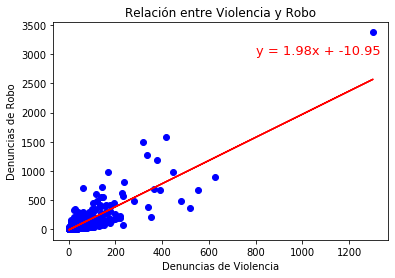

In [75]:
# Scatter Plot
# Getting x and y values
x_values = Por_Colonia['VIOLENCIA']
y_values = Por_Colonia['ROBO']

# Plot scatter plot
plt.scatter(x_values, y_values, color = 'blue', marker = 'o')
#plt.grid()

# Label plot
plt.title('Relación entre Violencia y Robo')
plt.xlabel('Denuncias de Violencia')
plt.ylabel('Denuncias de Robo')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot regression line an details
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (800, 3000), fontsize = 13, color="red")
print(f'The r-squared is: {rvalue}')

# Save the Figure
#plt.savefig("Fig1.png")

# Show plot
plt.show()

In [76]:
# Create Hour:
serie1 = carpetas2018['fecha_hechos']
serie1.dt.hour
carpetas2018["hora"] = pd.DataFrame(serie1.dt.hour)
carpetas2018.head()

,Unnamed: 0,Unnamed: 0.1,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,...,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,conducta,Dia_sem,dia,hora
251849,251849,930982,2018.0,Diciembre,2018-12-31 13:00:00,ABANDONO DE PERSONA,DELITO DE BAJO IMPACTO,"INVESTIGACIÃN PARA LA ATENCIÃN DE NIÃOS, NI...",59,UI-2CD,...,2019-12-31 18:07:42,AVENIDA JUAREZ NUMERO 8,JUZGADOS,NaN,NaN,NaN,VIOLENCIA,Lunes,1,13
75572,75572,330408,2018.0,Enero,2018-01-22 12:00:00,FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMEN...,DELITO DE BAJO IMPACTO,INVESTIGACIÃN PARA LA ATENCIÃN DE DELITOS FI...,T,UI-1SD,...,2018-02-14 11:31,"BOULEVARD MANUEL AVILA CAMACHO,",NaN,-99.203470,19.428314,"19.4283142149,-99.2034701038",ENGAÑO,Lunes,1,12
211036,211036,745364,2018.0,Septiembre,2018-09-03 18:45:00,ALLANAMIENTO DE MORADA,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN BENITO JUÃREZ,BJ-1,UI-1SD,...,2018-09-04 17:25,TLACOQUEMECATL,NaN,-99.174721,19.378548,"19.3785479745,-99.1747206501",VIOLENCIA,Lunes,1,18
211032,211032,745360,2018.0,Septiembre,2018-09-03 19:00:00,DAÃO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN ÃLVARO OBREGÃN,AO-3,UI-2CD,...,2018-09-04 17:13,CONDOR,NaN,-99.197648,19.361528,"19.3615277867,-99.19764767",VIOLENCIA,Lunes,1,19
75597,75597,330435,2018.0,Febrero,2018-02-12 16:30:00,ROBO DE DINERO,DELITO DE BAJO IMPACTO,INVESTIGACIÃN EN XOCHIMILCO,XO-2,UI-1SD,...,2018-02-14 12:31,5 DE MAYO,HIDALGO,-99.054958,19.250885,"19.2508854323,-99.0549584418",ROBO,Lunes,1,16


In [77]:
# Por Hora:
horas = carpetas2018["hora"].value_counts()

horas1 = pd.DataFrame(horas)

horas1 = horas1.sort_index(ascending=True)

horas1 = horas1.reset_index()

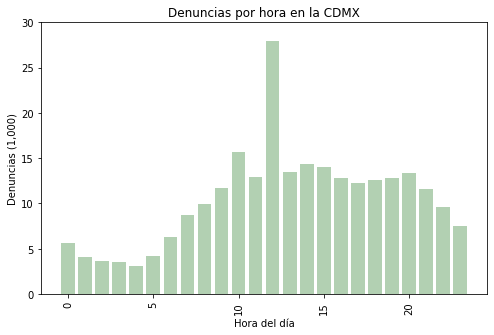

In [78]:
# Generate the Plot
Hora = horas1['index']
plt.figure(figsize = (8, 5))
plt.bar(Hora, horas1['hora']/1000 , color = 'darkgreen', alpha = .3, align = 'center')
#plt.plot(Time, mes1['Denuncias']/1000, marker = 'o', color = 'darkblue', linestyle = '-')
#plt.grid()
plt.title('Denuncias por hora en la CDMX')
plt.xlabel('Hora del día')
plt.ylabel('Denuncias (1,000)')
plt.xticks(rotation = 90)   
plt.ylim(0, 30)

# Save the Figure
#plt.savefig("suvival.png")

# Show the Figure
plt.show()

In [48]:
# Saving to CSV:
carpetas2018.to_csv("Carpetas2018.csv")